In [1]:
import pandas as pd
import numpy as np

In [2]:
# C:\Users\poduo\Anaconda3_JupyterNB\python_textbook_practice\Kaggle_Human Activity Recognition with Smartphones\data
addr_train = "../Kaggle_Human Activity Recognition with Smartphones/data/new_train.csv"
addr_test = "../Kaggle_Human Activity Recognition with Smartphones/data/new_test.csv"

train = pd.read_csv(addr_train)
test = pd.read_csv(addr_test)

ori_train = train.copy()
ori_test = test.copy()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 565 entries, Unnamed: 0 to Label
dtypes: float64(561), int64(3), object(1)
memory usage: 22.8+ MB


In [4]:
train.sample(5)

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Label
3662,5077,0.285717,-0.021643,-0.122403,-0.996899,-0.979404,-0.982244,-0.997271,-0.980163,-0.983001,...,-0.059671,0.049235,0.115171,0.062234,-0.663644,0.199002,-0.199352,25,STANDING,2
2708,3811,0.288406,0.001878,-0.091938,-0.992375,-0.932408,-0.977465,-0.992800,-0.936311,-0.975794,...,-0.065004,-0.185075,-0.091811,-0.054385,-0.816265,0.201064,-0.059575,19,STANDING,2
4383,6073,0.277530,-0.020664,-0.106117,-0.996955,-0.969600,-0.966983,-0.997395,-0.972061,-0.963284,...,-0.093482,0.031847,0.744458,0.811900,-0.814470,0.224863,0.038279,27,STANDING,2
1170,1671,0.274430,-0.017101,-0.104998,-0.994476,-0.991761,-0.991224,-0.995303,-0.990464,-0.991633,...,-0.238908,-0.134882,0.588514,0.451582,0.443873,-0.617058,-0.367938,8,LAYING,0
2914,4054,0.279440,-0.019260,-0.111554,-0.996488,-0.977516,-0.978028,-0.996948,-0.980164,-0.979302,...,-0.187590,0.063136,0.014398,0.027142,-0.932992,0.108547,0.066374,21,SITTING,1


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 565 entries, Unnamed: 0 to Label
dtypes: float64(561), int64(3), object(1)
memory usage: 8.9+ MB


## Get Data Set
### Label：0 Laying、1 SITTING、2 STANDING、3 WALKING

In [6]:
features = train.iloc[:, 1:562]
labels = train['Label']

In [7]:
X_test = test.iloc[:, 1:562]
y_test = test['Label']

In [8]:
all_colums_list = list(features)

In [9]:
type(all_colums_list)

list

## train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size = 0.3)

## Learning Model

In [12]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
Classifiers = [
    RandomForestClassifier(n_estimators=200),
    GradientBoostingClassifier(n_estimators=200),
    LinearSVC(C= 0.1),
    SVC(C= 20),
    SVC(C= 100),
    SVC(C= 1)
              ]

# sklearn.feature_selection.RFE
https://machine-learning-python.kspax.io/Feature_Selection/intro.html
https://machine-learning-python.kspax.io/Feature_Selection/ex2_Recursive_feature_elimination.html

In [14]:
from sklearn.feature_selection import RFE

In [15]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_

In [16]:
ranking_list = ranking.tolist()
type(ranking_list)

list

In [17]:
ranking

array([228, 191, 136, 302, 293, 259, 334, 403, 190, 295, 146, 393, 113,
        51, 357, 187, 479, 325, 354, 338, 418,  33,  43,  53, 278,  99,
       210,  81,  82, 229,  78, 172,  27,  67, 130,  79,  45,  42,  85,
       144,  22,   1,  97, 353, 169, 308, 318, 174, 140,  37,   4, 114,
         2,  14,  40,  13,  17,  75,  60, 170, 369, 119, 220,  71,  90,
       297, 283, 110,  76,  64, 141, 254, 438, 300, 366, 443, 330, 272,
       266, 239, 514, 186, 439, 312, 304, 270, 387, 377, 315, 282, 316,
       291, 192, 145, 236, 386, 495, 450, 510, 401, 362, 277,   3, 105,
         6,  50, 235, 253,  96,  21,  63,  28, 115,  34,  35,  86, 335,
       409,  38, 107,  57,  88, 179, 324, 363, 202, 352, 269, 128, 288,
       256, 298, 111, 280, 247,  15, 251, 422, 155, 156, 103, 258,  41,
       433, 404,   9, 126,  49, 133,   8, 134, 135,  62, 100, 195, 106,
        52, 207,  58, 167, 296, 241, 425, 245, 305, 219, 109, 314, 185,
       201, 303, 378, 218, 446, 342, 199, 471, 506, 541,  77, 25

In [18]:
rank_30_feature = []
rank_30_index = []

for i in ranking_list:
    if i < 31:
        rank_30_feature.append(all_colums_list[ranking_list.index(i)])
        rank_30_index.append(ranking_list.index(i))        

In [19]:
rank_30_index

[32,
 40,
 41,
 50,
 52,
 53,
 55,
 56,
 102,
 104,
 109,
 111,
 135,
 145,
 149,
 182,
 185,
 186,
 187,
 239,
 244,
 247,
 366,
 372,
 445,
 446,
 454,
 549,
 558,
 559]

In [20]:
rank_30_feature

['tBodyAcc-arCoeff()-Y,4',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyGyro-sma()',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyroJerk-entropy()-X',
 'tBodyGyroJerk-arCoeff()-X,1',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-entropy()',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-skewness()-X',
 'fBodyBodyGyroJerkMag-entropy()',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)']

In [21]:
print('X_train.shape：', X_train.shape)
print('y_train.shape：', y_train.shape)
print()
print('X_val.shape：', X_val.shape)
print('y_val.shape：', y_val.shape)
print()
print('X_test.shape', X_test.shape)
print('y_test.shape：', y_test.shape)


X_train.shape： (3705, 561)
y_train.shape： (3705,)

X_val.shape： (1588, 561)
y_val.shape： (1588,)

X_test.shape (2056, 561)
y_test.shape： (2056,)


前90個features

In [66]:
rank_120_feature = []
rank_120_index = []

for i in ranking_list:
    if i < 121:
        rank_120_feature.append(all_colums_list[ranking_list.index(i)])
        rank_120_index.append(ranking_list.index(i))        

In [67]:
rank_120_index

[12,
 13,
 21,
 22,
 23,
 25,
 27,
 28,
 30,
 32,
 33,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 63,
 64,
 67,
 68,
 69,
 102,
 103,
 104,
 105,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 118,
 119,
 120,
 121,
 132,
 135,
 140,
 142,
 145,
 147,
 149,
 152,
 153,
 155,
 156,
 158,
 166,
 179,
 182,
 183,
 185,
 186,
 187,
 189,
 192,
 193,
 194,
 196,
 197,
 207,
 208,
 220,
 221,
 235,
 238,
 239,
 243,
 244,
 246,
 247,
 251,
 260,
 276,
 287,
 289,
 297,
 298,
 366,
 367,
 368,
 372,
 425,
 437,
 445,
 446,
 447,
 449,
 451,
 452,
 454,
 455,
 456,
 505,
 511,
 523,
 525,
 537,
 549,
 550,
 552,
 553,
 556,
 558,
 559]

In [68]:
rank_120_feature

['tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',

In [69]:
type(rank_120_feature)

list

依據挑選出的features，重新設置訓練及驗證資料

In [22]:
rfe_X_train = pd.DataFrame()
rfe_X_val = pd.DataFrame()
rfe_X_test = pd.DataFrame()

for i in range(X_train.shape[1]):
    for rank in rank_30_feature:
        if X_train.columns[i] == rank:
            rfe_X_train = pd.concat([rfe_X_train, X_train.loc[:, rank]], axis= 1, ignore_index= False)
            rfe_X_val = pd.concat([rfe_X_val, X_val.loc[:, rank]], axis= 1, ignore_index= False)
            rfe_X_test = pd.concat([rfe_X_test, X_test.loc[:, rank]], axis= 1, ignore_index= False)
            break

In [23]:
print('rfe_X_train.shape：', rfe_X_train.shape)
print('y_train.shape：', y_train.shape)
print()
print('rfe_X_val.shape：', rfe_X_val.shape)
print('y_val.shape：', y_val.shape)
print()
print('rfe_X_test.shape', rfe_X_test.shape)
print('y_test.shape：', y_test.shape)

rfe_X_train.shape： (3705, 30)
y_train.shape： (3705,)

rfe_X_val.shape： (1588, 30)
y_val.shape： (1588,)

rfe_X_test.shape (2056, 30)
y_test.shape： (2056,)


In [45]:
rfe_X_test.sample(3)

,"tBodyAcc-arCoeff()-Z,4",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-max()-Y,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-sma(),tGravityAcc-energy()-X,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-Y,1",...,tBodyGyroMag-min(),tBodyGyroMag-sma(),tBodyGyroMag-iqr(),tBodyGyroMag-entropy(),fBodyAcc-entropy()-X,fBodyAccJerk-entropy()-X,fBodyAccJerk-meanFreq()-X,fBodyGyro-entropy()-X,"angle(X,gravityMean)","angle(Y,gravityMean)"
445,-0.512216,0.961842,-0.041201,-0.062480,0.979818,-0.026676,-0.537725,0.895356,-0.489499,-0.088812,...,-0.786028,-0.673533,-0.753764,0.872303,-0.407823,-0.646947,-0.579704,-0.161772,-0.853509,0.112055
1137,-0.496849,-0.107192,0.451642,0.416415,-0.067708,0.464967,0.494565,-0.875945,-0.429422,0.121406,...,-0.969075,-0.951198,-0.941155,0.273651,-0.782225,-1.000000,-0.205050,-0.397729,0.324136,-0.247840
1575,-0.068931,0.870844,0.162291,0.138065,0.889270,0.181868,0.200793,0.662841,-0.685725,0.008261,...,-0.990675,-0.978118,-0.975401,-0.038415,-0.854006,-1.000000,0.204247,-0.776641,-0.622640,-0.027893


#### 由rfe挑出來的features 來訓練模型

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
def run_Classifiers(model, out_accuracy, X_train, y_train, X_test, y_test):
    for clf in Classifiers:
        fit = clf.fit(X_train, y_train)
        pred = fit.predict(X_test)
        model.append(clf.__class__.__name__)
        out_accuracy.append(accuracy_score(y_test,pred))
    return model, out_accuracy

In [26]:
model_rfe=[]
out_accuracy_rfe=[]

model_rfe, out_accuracy_rfe = run_Classifiers(model_rfe, out_accuracy_rfe,
                                              rfe_X_train, y_train, rfe_X_val, y_val)

In [27]:
out_accuracy_rfe

[0.97481108312342568,
 0.98047858942065491,
 0.97229219143576828,
 0.97418136020151136,
 0.97795969773299751,
 0.97040302267002521]

In [28]:
model_rfe_test=[]
out_accuracy_rfe_test=[]

model_rfe_test, out_accuracy_rfe_test = run_Classifiers(model_rfe_test, out_accuracy_rfe_test,
                                                        rfe_X_train, y_train, rfe_X_test, y_test)
out_accuracy_rfe_test

[0.91731517509727623, 0.92412451361867709, 0.95087548638132291, 0.95573929961089499, 0.95914396887159536, 0.94941634241245132]


# SelectFromModel

https://machine-learning-python.kspax.io/Feature_Selection/ex4_feature_selection_using_selectfrommodel_md.html

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
en_gbc = GradientBoostingClassifier().fit(X_train, y_train)
model_en_gbc = SelectFromModel(en_gbc, prefit= True)
gbc_X_train = model_en_gbc.transform(X_train)
print(gbc_X_train.shape)

NameError: name 'features_en_gbc' is not defined

In [31]:
gbc_X_train.shape

(3705, 90)

In [32]:
model_for_gbc=[]
out_accuracy_gbc=[]

gbc_X_val = model_en_gbc.transform(X_val)

model_for_gbc, out_accuracy_gbc = run_Classifiers(model_for_gbc, out_accuracy_gbc, 
                                                  gbc_X_train, y_train, gbc_X_val, y_val)
out_accuracy_gbc

[0.98299748110831231, 0.98551637279596982, 0.96977329974811088, 0.97607052896725444, 0.97984886649874059, 0.96095717884130982]


In [33]:
model_for_gbc_test=[]
out_accuracy_gbc_test=[]

gbc_X_test = model_en_gbc.transform(X_test)

model_for_gbc_test, out_accuracy_gbc_test = run_Classifiers(model_for_gbc_test, out_accuracy_gbc_test, 
                                                  gbc_X_train, y_train, gbc_X_test, y_test)
out_accuracy_gbc_test

[0.9382295719844358,
 0.94601167315175094,
 0.95914396887159536,
 0.96400778210116733,
 0.96498054474708173,
 0.95768482490272377]

In [39]:
gbc_index = model_en_gbc.get_support(indices=True)

In [40]:
gbc_index.shape

(90,)

In [46]:
list(gbc_index)

[6,
 16,
 19,
 29,
 32,
 38,
 40,
 41,
 42,
 43,
 46,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 65,
 78,
 86,
 95,
 99,
 101,
 104,
 113,
 115,
 116,
 129,
 132,
 135,
 136,
 138,
 139,
 142,
 146,
 149,
 152,
 157,
 158,
 159,
 166,
 179,
 183,
 186,
 187,
 192,
 194,
 196,
 197,
 199,
 227,
 228,
 232,
 234,
 277,
 284,
 290,
 353,
 359,
 366,
 371,
 372,
 373,
 381,
 389,
 403,
 409,
 417,
 421,
 429,
 432,
 442,
 445,
 451,
 454,
 459,
 461,
 462,
 490,
 521,
 537,
 551,
 553,
 557,
 558,
 559,
 560]

In [47]:
type(gbc_index)

numpy.ndarray

In [42]:
gbc_features = []

for j in gbc_index :
    for i in range( len(all_colums_list)) :
        if i == j :
            gbc_features.append(all_colums_list[i])            

In [43]:
gbc_features

['tBodyAcc-mad()-X',
 'tBodyAcc-energy()-X',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-correlation()-X,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-mad()-X',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-correlation()-X,Z',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Z',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyGyro-max()-X',
 'tBodyGyro-min()-X',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-Y,1',
 'tB

# sklearn.feature_selection.RFECV
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
%matplotlib inline

Optimal number of features : 225


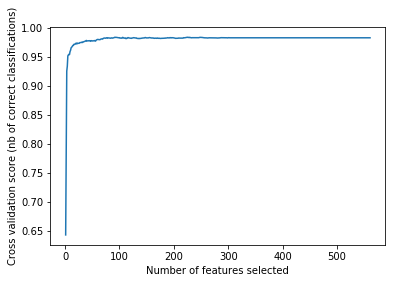

In [55]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel= "linear")

rfecv = RFECV(estimator= svc, step= 1, cv= StratifiedKFold(n_splits= 10, shuffle= True), scoring='accuracy')
rfecv.fit(features, labels)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [61]:
rfecv_index = rfecv.get_support(indices=True)

In [62]:
rfecv_index.shape

(225,)

In [63]:
list(rfecv_index)

[1,
 2,
 4,
 10,
 12,
 13,
 14,
 15,
 22,
 23,
 24,
 25,
 27,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 62,
 63,
 64,
 67,
 68,
 69,
 70,
 73,
 90,
 91,
 93,
 102,
 103,
 104,
 105,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 118,
 119,
 120,
 121,
 123,
 131,
 132,
 135,
 136,
 139,
 140,
 142,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 158,
 159,
 160,
 161,
 163,
 165,
 166,
 168,
 171,
 175,
 179,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 205,
 207,
 208,
 212,
 213,
 215,
 218,
 220,
 221,
 225,
 234,
 235,
 238,
 239,
 241,
 243,
 244,
 246,
 247,
 250,
 251,
 252,
 256,
 257,
 260,
 263,
 264,
 266,
 269,
 270,
 272,
 273,
 275,
 276,
 277,
 279,
 285,
 287,
 288,
 289,
 292,
 293,
 294,
 295,
 297,
 298,
 299,
 301,
 348,
 354,
 365,
 366,
 367,
 368,
 369,
 370,
 372,
 374,
 376,
 379,
 380,
 426,


In [64]:
rfecv_features = []

for j in rfecv_index :
    for i in range( len(all_colums_list)) :
        if i == j :
            rfecv_features.append(all_colums_list[i])            

In [65]:
rfecv_features

['tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-Y',
 'tBodyAcc-max()-Y',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-a

Optimal number of features : 111


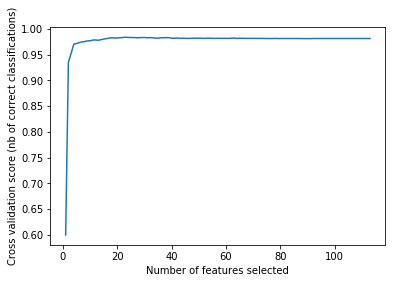

In [54]:
# Create the RFE object and compute a cross-validated score.
svc20 = SVC(kernel= "linear")

rfecv20 = RFECV(estimator= svc20, step= 5, cv= StratifiedKFold(n_splits= 10, shuffle= True), scoring='accuracy')
rfecv20.fit(features, labels)

print("Optimal number of features : %d" % rfecv20.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv20.grid_scores_) + 1), rfecv20.grid_scores_)
plt.show()

In [56]:
rfecv20_index = rfecv20.get_support(indices=True)

In [57]:
rfecv20_index.shape

(111,)

In [58]:
list(rfecv20_index)

[12,
 13,
 14,
 22,
 23,
 27,
 30,
 31,
 32,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 49,
 50,
 52,
 53,
 55,
 56,
 57,
 58,
 63,
 64,
 68,
 69,
 70,
 93,
 102,
 103,
 104,
 105,
 109,
 110,
 112,
 113,
 114,
 115,
 118,
 119,
 120,
 121,
 131,
 135,
 140,
 142,
 145,
 147,
 149,
 152,
 153,
 156,
 158,
 166,
 179,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 208,
 221,
 235,
 238,
 239,
 241,
 243,
 244,
 246,
 247,
 260,
 272,
 276,
 287,
 289,
 295,
 298,
 366,
 368,
 369,
 372,
 436,
 437,
 445,
 446,
 447,
 450,
 451,
 454,
 455,
 511,
 523,
 527,
 531,
 535,
 549,
 550,
 558,
 559]

In [59]:
rfecv20_features = []

for j in rfecv20_index :
    for i in range( len(all_colums_list)) :
        if i == j :
            rfecv20_features.append(all_colums_list[i])   

In [60]:
rfecv20_features

['tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,2',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBody

# 取交集

### rfe to dic 120

In [70]:
rfe_dict = dict(zip(rank_120_index, rank_120_feature))

### gbc to dic 90

In [72]:
gbc_dict = dict(zip(list(gbc_index), gbc_features))

### rfecv to dic 111

In [73]:
rfecv20_dict = dict(zip(list(rfecv20_index), rfecv20_features))

### 取交集

In [84]:
item = [item for item in gbc_dict.keys() if item in rfe_dict.keys()]

In [87]:
item2 = [x for x in item if x in rfecv20_dict.keys()]

In [89]:
item2

[32,
 38,
 40,
 41,
 42,
 49,
 50,
 52,
 53,
 55,
 56,
 57,
 104,
 113,
 115,
 135,
 142,
 149,
 152,
 158,
 166,
 179,
 183,
 186,
 187,
 192,
 194,
 196,
 197,
 366,
 372,
 445,
 451,
 454,
 558,
 559]

In [90]:
union_features = []

for j in item2 :
    for i in range( len(all_colums_list)) :
        if i == j :
            union_features.append(all_colums_list[i])  

In [91]:
union_features

['tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-correlation()-X,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyGyro-sma()',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-meanFreq()-X',
 'fBodyGyro-skewness()-X',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)']

# 篩選出的36個特徵分類效果

In [92]:
f_X_train = pd.DataFrame()
f_X_val = pd.DataFrame()
f_X_test = pd.DataFrame()

for i in range(X_train.shape[1]):
    for rank in union_features:
        if X_train.columns[i] == rank:
            f_X_train = pd.concat([f_X_train, X_train.loc[:, rank]], axis= 1, ignore_index= False)
            f_X_val = pd.concat([f_X_val, X_val.loc[:, rank]], axis= 1, ignore_index= False)
            f_X_test = pd.concat([f_X_test, X_test.loc[:, rank]], axis= 1, ignore_index= False)
            break

In [93]:
model_final=[]
out_accuracy_final=[]

model_final, out_accuracy_final = run_Classifiers(model_final, out_accuracy_final, 
                                                  f_X_train, y_train, f_X_val, y_val)
out_accuracy_final

[0.97921914357682616,
 0.98425692695214106,
 0.96788413098236781,
 0.97166246851385385,
 0.97166246851385385,
 0.96599496221662473]

In [94]:
model_final_test=[]
out_accuracy_final_test=[]

model_final_test, out_accuracy_final_test = run_Classifiers(model_final_test, out_accuracy_final_test, 
                                                  f_X_train, y_train, f_X_val, y_val)
out_accuracy_final_test

[0.97795969773299751,
 0.98425692695214106,
 0.96788413098236781,
 0.97166246851385385,
 0.97166246851385385,
 0.96599496221662473]

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

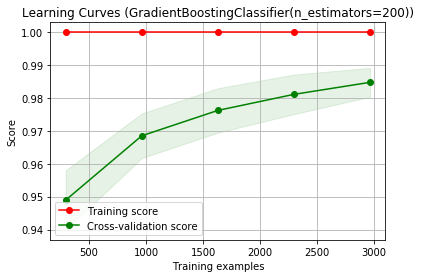

In [97]:
title = "Learning Curves (GradientBoostingClassifier(n_estimators=200))"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(n_estimators=200)

plot_learning_curve(estimator, title, f_X_train, y_train, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

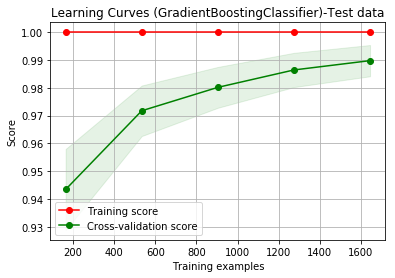

In [98]:
title = "Learning Curves (GradientBoostingClassifier)-Test data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(n_estimators=200)

plot_learning_curve(estimator, title, f_X_test, y_test, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()